In [25]:
import pandas as pd
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

import numpy as np

In [2]:
stockFile = '../../project/data/stock/stockDelta.csv'
tweetFile = '../../project/data/opinion/tweetDays.csv'

stocks = pd.read_csv(stockFile)
stocks.Date = pd.to_datetime(stocks.Date)
stocks = stocks.set_index('Date')
tweets = pd.read_csv(tweetFile)
tweets.date = pd.to_datetime(tweets.date)
tweets = tweets.set_index('date')

In [3]:
stocks

,CBAY,CCLP,CCRN,CONE,CPIX,CREE,CRESY,CRIS,CROX,CRTO,...,FLWS,GNMX,JOBS,PIH,SRCE,TPNL,TURN,TWOU,VNET,XLRN
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-21,-0.30,-0.141182,-0.18,0.264731,0.03,0.300004,0.058810,-0.300000,0.08,0.610001,...,-0.23,0.03,0.610001,0.150,-0.101675,0.09,0.04,0.340001,-0.010000,0.090001
2015-04-22,-0.14,0.123537,0.01,0.150016,0.02,-3.040001,0.333258,0.450000,0.11,-0.060002,...,0.14,-0.08,-0.010002,-0.070,0.203344,0.20,0.02,0.450000,0.010000,-0.020001
2015-04-23,-0.12,0.123534,0.43,0.000000,0.00,-0.130001,0.156826,0.450000,0.23,0.290001,...,0.13,0.07,0.369999,-0.028,-0.563827,-0.01,-0.02,1.420000,0.129999,0.570004
2015-04-24,-0.21,0.052944,0.07,0.423577,0.02,-0.359999,-0.098017,-0.050000,0.00,0.299999,...,0.19,-0.15,-0.169999,-0.012,0.000000,-0.03,0.00,-0.909999,0.060002,-0.950001
2015-04-27,0.00,0.235302,-0.35,0.185314,-0.36,0.449999,0.049008,-0.400000,0.40,0.180001,...,-0.44,-0.81,0.130002,-0.110,-0.110915,-0.14,0.00,-0.980002,0.289999,-1.580002
2015-04-28,-0.17,-0.047060,0.36,0.114719,0.20,0.279998,-0.147024,-1.050000,0.12,-0.830002,...,1.17,0.04,1.459999,0.140,0.462155,-0.03,-0.02,-0.189998,0.260000,-0.719999
2015-04-29,0.00,-0.027103,-0.02,0.291207,-0.10,-0.250000,0.019603,-0.300000,-0.09,-0.419998,...,-0.88,-0.06,-1.010003,0.000,-0.434427,0.00,-0.02,-0.090001,-0.200001,-0.970000
2015-04-30,-0.01,0.252943,-0.49,-0.141188,-0.15,-0.669998,-0.382266,-0.200000,-0.20,-0.990002,...,-0.56,-0.33,-0.599998,-0.210,-0.878100,0.00,0.02,0.010001,0.020001,-2.370000
2015-05-01,-0.14,0.090334,-0.26,-0.088245,0.02,-0.559999,0.147026,0.300000,-0.27,0.840000,...,-0.37,0.00,0.509998,0.010,-0.092966,0.04,-0.01,0.569999,0.020000,1.090000


In [8]:
'''
n = number of days back
t = stock table
'''
def stockX(n,t):
        
    if not isinstance(t,pd.DataFrame):
        t = pd.DataFrame(t)
    
    N = t.shape[0]
    firstCol = True

    for col in t.columns.tolist():
        
        for i in range(1,n+1):
            name = col+'_d-'+str(i)
            
            start = n-i
            end = N-i

            if i == 1 and firstCol:
                X = pd.DataFrame( t[col][start:end].values,columns=[name])
                firstCol = False

            else:
                X[name] = t[col][start:end].values

            
    X.index = t[n:].index

    return X   

In [9]:
def twitterX(n,t,atts):
    
    perp = 'perp' in atts
    app = 'app' in atts
    apn = 'apn' in atts
    
    pri
    
    Nt = t.shape[0]
    cols = []
    for i in range(1,n+1):
        start = n-i
        end = Nt-i

        if i == 1:  
            Xt = pd.DataFrame(t[start:end].values)
            Xt = Xt.drop(columns=[1]) # dont need % positive tweets AND %negative tweets
        else:
            if perp:
                Xt['perp'+str(i)] = t.perP[start:end].values
                cols.append('d-'+str(i)+'_perP')
            if app:
                Xt['app'+str(i)] = t.app[start:end].values
                cols.append('d-'+str(i)+'_app')
            if apn:
                Xt['anp'+str(i)] = t.anp[start:end].values
                cols.append('d-'+str(i)+'_anp')

    Xt.index = t[n:].index
    Xt.columns = ['d-1_perP','d-1_app','d-1_apn','d-1_sentiment']+cols

    return Xt

In [10]:
'''
sh = stock history days
th = tweet history days
s = stock table
t = tweet table
atts = attributes of tweet to pass
'''
def getXy(sh,th,s,t,atts):
    
    X = stockX(sh,s)               # Creates table with specified stock, and number of days in the past
    Xt = twitterX(th,t,atts)       # Creates table with specified traits and number of days in the past

    if X.index[0] >= Xt.index[0]:          # Makes sure we have stock and tweet data for both datas
        firstDate = Xt.index[0]
    else:
        firstDate = X.index[0]

    oldStocks = X[X.index >= firstDate]
    oldTweets = Xt[Xt.index >= firstDate]

    XX = oldStocks.join(oldTweets)[:-1]    # Bring two together
    XX = XX.dropna(axis=0)                 # End of jan/ early feb looks like prof couldnt get twitter data.

    # Update desired vals
    Y = pd.DataFrame(stocks.TSLA)                               
    y = Y[(Y.index >= XX.index[0]) & (Y.index <= XX.index[-1])]

    # Some days may have 0 tweets - removes from list
    correctIndex = [x in XX.index.tolist() for x in y.index.tolist()]
    y = y[correctIndex]
    
    return XX, y


In [11]:
'''
shl - list of stock history dates to loop over
thl - list of tweet history dates to loop over
s   - stocks table
t   - tweets table
attsl - list of attributes for tweets (list of lists)
sl  - list of stocks to use (list of lists)
'''

def findBest(shl,thl,s,t,attsl,sl):
    lowestRMS = [['init'],100000]
    biggestR2 = [['init'],-10000]
    biggestAcc = [['init'],0]
    
    
    for stockHistory in shl:
        for tweetHistory in thl:
            for att in attsl:
                for stocklist in sl:
                    X,y = getXy(stockHistory,tweetHistory,s[stocklist],t,att)
                    
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 , random_state=1)
                    
                    regr = linear_model.LinearRegression()
                    regr.fit(X_train, y_train)
                    y_pred_test = regr.predict(X_test)
                    y_pred_train = regr.predict(X_train)
                    
                    rms = np.sqrt(mean_squared_error(y_train, y_pred_train))
                    r2 = r2_score(y_train, y_pred_train)
                    acc = sum(np.sign(y_pred_train) == np.sign(y_train.values))[0]/len(y_pred_train)
                    
                    if rms < lowestRMS[1]:
                        lowestRMS[0] = [stockHistory,tweetHistory,att,stocklist]
                        lowestRMS[1] = rms
                        
                    if r2 > biggestR2[1]:
                        biggestR2[0] = [stockHistory,tweetHistory,att,stocklist]
                        biggestR2[1] = r2
                        
                    if acc > biggestAcc[1]:
                        biggestAcc[0] = [stockHistory,tweetHistory,att,stocklist]
                        biggestAcc[1] = acc
                        
                        
    return lowestRMS,biggestR2, biggestAcc

In [369]:
'''
shl - list of stock history dates to loop over
thl - list of tweet history dates to loop over
s   - stocks table
t   - tweets table
attsl - list of attributes for tweets (list of lists)
sl  - list of stocks to use (list of lists)
numFolds   - Num folds for CV
'''

def findBestCV(shl,thl,s,t,attsl,sl,numFolds):
    loop = 1
    totLoop = len(shl)*len(thl)*len(attsl)*len(sl)
    allScores = []
    
    for stockHistory in shl:
        for tweetHistory in thl:
            for att in attsl:
                for stocklist in sl:
                    X,y = getXy(stockHistory,tweetHistory,s[stocklist],t,att)
                    
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 , random_state=1)
                    
                    model = linear_model.LinearRegression()
                    scores = cross_val_score(model, X_train, y_train.values.reshape(-1,), cv = numFolds)#, \
                                             #scoring='neg_mean_squared_error' )
                    
                    #allScores.append([[stockHistory,tweetHistory,att,stocklist],np.sqrt(np.abs(np.mean(scores)))])
                  
                    allScores.append([[stockHistory,tweetHistory,att,stocklist],(np.mean(scores))])
                    
                    print(str(loop)+'/'+str(totLoop))
                    loop += 1
    
    allScores.sort(key=lambda x: x[1], reverse = False)   # sort by mean score           
    return allScores

In [150]:
corr = stocks.corr()
highCorr = pd.DataFrame(abs(corr['TSLA'])).nlargest(10,'TSLA')[1:] #1 is tesla
smallCorr = pd.DataFrame(abs(corr['TSLA'])).nsmallest(10,'TSLA')
potentialStocks = smallCorr.index.tolist() + highCorr.index.tolist()
potentialStocks
#stocks[current]

['GENC',
 'SBT',
 'BANX',
 'UBFO',
 'PGLC',
 'PEER',
 'VIRC',
 'SLQD',
 'RGCO',
 'MVBF',
 'QCLN',
 'PNQI',
 'QQXT',
 'PTF',
 'SOCL',
 'ONEQ',
 'SKYY',
 'FV',
 'DWAQ']

In [209]:
def findLowestCorr(corr,other,s):
    small = pd.DataFrame(abs(corr[s])).nsmallest(50,s).index.tolist()
    new = ''
    i = 0
    while new == '':
        temp = small[i]
        if temp not in other:
            new = temp
        else:
            i += 1
    return new

In [290]:
newStocksssss = ['TSLA']
for i in range(50):
    newStocksssss.append(findLowestCorr(corr,newStocksssss,newStocksssss[-1]))
newStocksssss

['TSLA',
 'GENC',
 'MARK',
 'CCIH',
 'NCMI',
 'RADA',
 'OPTT',
 'IIVI',
 'JCTCF',
 'SVA',
 'NAKD',
 'MBB',
 'CALA',
 'TLT',
 'KGJI',
 'SWIR',
 'IUS',
 'ANGI',
 'TGLS',
 'COWN',
 'OPHC',
 'OSIS',
 'SBLK',
 'MNST',
 'BLNK',
 'ADXS',
 'ZYXI',
 'ISTB',
 'CDXC',
 'CDOR',
 'BOTJ',
 'AEY',
 'CHRS',
 'LLEX',
 'SPWH',
 'SPEX',
 'TRIB',
 'OMEX',
 'SCHL',
 'DVCR',
 'FULT',
 'BRID',
 'AMRS',
 'NVIV',
 'GOLD',
 'SPTN',
 'CLWT',
 'TELL',
 'CHEF',
 'OVBC',
 'GABC']

In [296]:
maxStockCompare = 10
listOflistsOfStocks = [potentialStocks[:i] for i in range(1, maxStockCompare+1)]

In [435]:
stockHistl = list(range(2,6))
tweetHistl = list(range(2,6))
attsl = [['perp'],['app'],['apn'],['perp','app'],['perp','app','apn'],['app','apn'],['perp','apn']]
sl = [newStocksssss[:3],newStocksssss[:4],newStocksssss[:5],newStocksssss[:6],newStocksssss[:7],newStocksssss[:8]]
len(stockHistl)*len(tweetHistl)*len(attsl)*len(sl)
#rmsT, r2T, accT = findBest(stockHistl,tweetHistl,stocks,tweets,attsl,sl)

672

In [436]:
numFolds = 7
cvResults = findBestCV(stockHistl,tweetHistl,stocks,tweets,attsl,sl,numFolds)

1/672
2/672
3/672
4/672
5/672
6/672
7/672
8/672
9/672
10/672
11/672
12/672
13/672
14/672
15/672
16/672
17/672
18/672
19/672
20/672
21/672
22/672
23/672
24/672
25/672
26/672
27/672
28/672
29/672
30/672
31/672
32/672
33/672
34/672
35/672
36/672
37/672
38/672
39/672
40/672
41/672
42/672
43/672
44/672
45/672
46/672
47/672
48/672
49/672
50/672
51/672
52/672
53/672
54/672
55/672
56/672
57/672
58/672
59/672
60/672
61/672
62/672
63/672
64/672
65/672
66/672
67/672
68/672
69/672
70/672
71/672
72/672
73/672
74/672
75/672
76/672
77/672
78/672
79/672
80/672
81/672
82/672
83/672
84/672
85/672
86/672
87/672
88/672
89/672
90/672
91/672
92/672
93/672
94/672
95/672
96/672
97/672
98/672
99/672
100/672
101/672
102/672
103/672
104/672
105/672
106/672
107/672
108/672
109/672
110/672
111/672
112/672
113/672
114/672
115/672
116/672
117/672
118/672
119/672
120/672
121/672
122/672
123/672
124/672
125/672
126/672
127/672
128/672
129/672
130/672
131/672
132/672
133/672
134/672
135/672
136/672
137/672
138/672
139/

In [437]:
cvResults.sort(key=lambda x: x[1], reverse = True)   #
cvResults

[[[2, 5, ['apn'], ['TSLA', 'GENC', 'MARK']], -0.07033655363240725],
 [[2, 5, ['apn'], ['TSLA', 'GENC', 'MARK', 'CCIH']], -0.0891892619614129],
 [[4, 3, ['app'], ['TSLA', 'GENC', 'MARK']], -0.09962208031916243],
 [[5, 3, ['app'], ['TSLA', 'GENC', 'MARK']], -0.10383002413965474],
 [[4, 3, ['perp'], ['TSLA', 'GENC', 'MARK']], -0.11110535859632875],
 [[4, 3, ['apn'], ['TSLA', 'GENC', 'MARK']], -0.11386320429757599],
 [[2, 2, ['apn'], ['TSLA', 'GENC', 'MARK']], -0.11434754651121502],
 [[5, 3, ['perp'], ['TSLA', 'GENC', 'MARK']], -0.11853975544915271],
 [[5, 3, ['apn'], ['TSLA', 'GENC', 'MARK']], -0.1187964281892684],
 [[2, 3, ['apn'], ['TSLA', 'GENC', 'MARK', 'CCIH']], -0.12029559071982744],
 [[2, 2, ['perp', 'apn'], ['TSLA', 'GENC', 'MARK']], -0.12447503520378632],
 [[2, 2, ['app', 'apn'], ['TSLA', 'GENC', 'MARK']], -0.12744210231031228],
 [[2, 5, ['app', 'apn'], ['TSLA', 'GENC', 'MARK']], -0.12861690301345213],
 [[2, 3, ['apn'], ['TSLA', 'GENC', 'MARK']], -0.12909277741477024],
 [[2, 3, [

In [438]:
rms = [x[1] for x in cvResults]
rms

[-0.07033655363240725,
 -0.0891892619614129,
 -0.09962208031916243,
 -0.10383002413965474,
 -0.11110535859632875,
 -0.11386320429757599,
 -0.11434754651121502,
 -0.11853975544915271,
 -0.1187964281892684,
 -0.12029559071982744,
 -0.12447503520378632,
 -0.12744210231031228,
 -0.12861690301345213,
 -0.12909277741477024,
 -0.13068982586066288,
 -0.13069468407090867,
 -0.13261585109257223,
 -0.13305245893413736,
 -0.13348724607660092,
 -0.1344819883872653,
 -0.13526806613789483,
 -0.13762863706998998,
 -0.1391434815208483,
 -0.1393436318107913,
 -0.14063695295239195,
 -0.1412119298701425,
 -0.1427260696980189,
 -0.1428247390078798,
 -0.1430919325689375,
 -0.14440181966767743,
 -0.1467796773070473,
 -0.14682789246510453,
 -0.14967340522689884,
 -0.14969600658745127,
 -0.1510420355819205,
 -0.15131583012782235,
 -0.15140434454324422,
 -0.1517136076866377,
 -0.15183350253633762,
 -0.1525339404153257,
 -0.15340810602842028,
 -0.15360570902985016,
 -0.15396904151984622,
 -0.15553268256069366,
 

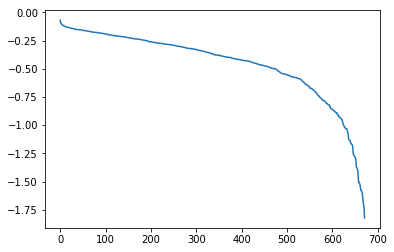

In [439]:
plt.plot(range(len(cvResults)),rms)

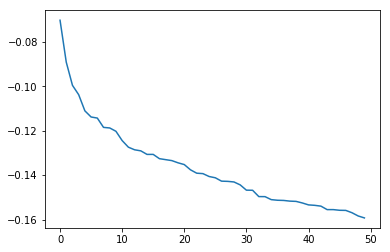

In [455]:
plt.plot(rms[:50])


In [476]:
cvResults[7]

[[5, 3, ['perp'], ['TSLA', 'GENC', 'MARK']], -0.11853975544915271]

In [86]:
def writeResults(l,f):
    with open(f, 'w') as f:
        for item in cvResults:
            f.write("%s\n" % item)

In [178]:
f = '../../project/data/stock/allCols.txt'
#writeResults(cvResults,f)

In [477]:
stockHist = 5                      # How far in the past (days) do we look for stock
tweetHist = 3                         # How far in the past do we look for twitter

s = stocks[['TSLA','GENC', 'MARK']]
#s = stocks[newStocksssss]
atts = ['perp']

X,y = getXy(stockHist,tweetHist,s,tweets,atts)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 , random_state=1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)


print("TRAIN Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)) )
print("TRAIN R-square = %.4f" % r2_score(y_train, y_pred_train) )
print("TRAIN +/- accuracy = ", sum(np.sign(y_pred_train) == np.sign(y_train.values))[0]/len(y_pred_train))
print()
print("TEST Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)) )
print("TEST R-square = %.4f" % r2_score(y_test, y_pred_test) )
print("TEST +/- accuracy = ", sum(np.sign(y_pred_test) == np.sign(y_test.values))[0]/len(y_pred_test))
print()
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

TRAIN Root mean squared error = 5.7541
TRAIN R-square = 0.1314
TRAIN +/- accuracy =  0.643312101910828

TEST Root mean squared error = 5.7516
TEST R-square = -0.0779
TEST +/- accuracy =  0.6029411764705882

Slope Coefficients: [[ 6.46277900e-03  4.19123998e-02 -2.59965468e-02 -1.54065297e-01
  -8.05702957e-02 -4.95311466e+00  2.55552126e+00 -1.58230944e+00
  -1.95166809e+00  3.80380380e+00  3.13774543e+00  5.19822048e-01
   1.87172217e+00  8.04360581e+00  9.53539160e+00 -2.21486169e+01
   1.12135167e-01 -3.41313285e-01 -2.57298285e+00  7.99134513e+00
  -1.27466371e+01]]
Intercept: [5.84654345]


In [484]:
pd.DataFrame(data=regr.coef_, columns=X.columns).T

,0
TSLA_d-1,0.006463
TSLA_d-2,0.041912
TSLA_d-3,-0.025997
TSLA_d-4,-0.154065
TSLA_d-5,-0.080570
GENC_d-1,-4.953115
GENC_d-2,2.555521
GENC_d-3,-1.582309
GENC_d-4,-1.951668
GENC_d-5,3.803804


In [486]:
#X.to_csv('./someData/manyStockswTwitter.csv')